# **9️⃣ Recurrent Neural Networks (RNNs): What They Are & How They Differ from Standard Neural Networks 🔄🤖🏀⚽**

## **💡 Real-Life Analogy: The Coach Who Remembers Past Plays 🏀⚽🎥**

Imagine you're a sports coach who not only plans for the next play but also **remembers every previous play** during a game.

- In a **standard neural network**, each play (input) is treated independently—like reading a list of isolated game stats.
- In a **recurrent neural network (RNN)**, the coach **remembers previous plays** to make smarter decisions for the current play.
- This memory is crucial in dynamic sports like the NBA, where a player's performance over time matters, or in football where game momentum shifts over time.

## **📌 What is a Recurrent Neural Network (RNN)?**

✅ **RNNs** are a special class of neural networks designed to **handle sequential data** by maintaining an internal **memory (hidden state)** that captures information about previous inputs.
✅ They are particularly useful for tasks like **time-series forecasting**, **language modeling**, **video analysis**, and **sequence classification**.

### **Key Concepts:**

- **Sequential Data Processing**: RNNs process inputs one at a time, maintaining a state that is updated at every time step.
- **Hidden State**: At each time step $ t $, an RNN has a hidden state $ h_t $ that depends on the current input $ x_t $ and the previous hidden state $ h_{t-1} $.
- **Parameter Sharing**: The same set of weights is applied at every time step, allowing the network to generalize across different sequence positions.

## **📊 Mathematical Formulation of an RNN**

At each time step $ t $:  
$$
h_t = \sigma(W_{xh} x_t + W_{hh} h_{t-1} + b_h)
$$
$$
y_t = \phi(W_{hy} h_t + b_y)
$$
Where:  
- $ x_t $ = input at time $ t $  
- $ h_t $ = hidden state at time $ t $  
- $ y_t $ = output at time $ t $  
- $ W_{xh} $, $ W_{hh} $, $ W_{hy} $ = weight matrices  
- $ b_h $, $ b_y $ = bias vectors  
- $ \sigma $ is an activation function (e.g., **tanh** or **ReLU**)  
- $ \phi $ is the output activation (e.g., **softmax** for classification)

## **📌 How RNNs Differ from Standard Neural Networks (Feed-Forward NNs)**

| **Aspect**            | **Standard NN (Feed-Forward)**          | **RNN**                                            |
|-----------------------|-----------------------------------------|----------------------------------------------------|
| **Data Handling**     | Processes **independent** inputs only 🔹 | Processes **sequential data** with memory 🔄        |
| **Architecture**      | Layers with no cycles (acyclic) ➡️       | Contains **cycles**; outputs depend on previous steps 🔁 |
| **Memory**            | No inherent memory; every input is separate | Maintains a hidden state $ h_t $ that **remembers past inputs** 🧠  |
| **Parameter Sharing** | Different weights per layer 🏗️           | Same weights are applied at each time step (efficient!) ⚙️|
| **Application**       | Image classification, static regression  | Language modeling, time-series prediction, video analysis |

## **📊 Sports Examples Using RNNs with Emojis**

### 🏀 NBA Example: Predicting Player Performance Over a Season
- **Scenario**: Predict a player's **performance trend** (e.g., points per game) over time by considering previous game stats.
- **RNN Use**: The RNN remembers past game performances (hidden state) to forecast the next game's output.
- **Real-Life Impact**: Helps coaches and analysts **spot performance trends** and **adjust strategies** dynamically.

### ⚽ Football Example: Analyzing Game Momentum
- **Scenario**: Analyze a match by feeding in sequences like **possession percentages, pass accuracies, and shot counts** over time.
- **RNN Use**: The model captures **temporal patterns** (momentum swings) to predict key events like a goal or a turnover.
- **Real-Life Impact**: Provides insights for **in-game tactical adjustments**.

### ♠️ Texas Hold’em Poker Example: Sequence of Betting Actions
- **Scenario**: Model a player's betting behavior over multiple rounds of a hand.
- **RNN Use**: By processing the sequence of bets and actions, the RNN can help predict whether a bluff is occurring or estimate the strength of a hand.
- **Real-Life Impact**: Enhances strategy development and opponent behavior analysis.

## **🛠️ Python Code Example: RNN for NBA Player Performance Prediction**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Set seeds for reproducibility 🔒
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# -------------------------------
# Generate Synthetic NBA Performance Data 🏀✨
# -------------------------------
def generate_nba_performance(n_games=82):
    """
    Simulates an NBA player's points per game over a season (82 games).
    We'll create a time series with some trend and noise.
    """
    # Simulate a base trend (e.g., improving performance over the season)
    base = np.linspace(15, 30, n_games)  # from 15 points to 30 points over 82 games
    # Add some random fluctuations (noise)
    noise = np.random.normal(0, 2, n_games)
    performance = base + noise
    return performance

In [4]:
# Prepare the data as sequences for RNN
# We'll use the previous 40 games to predict the next game
def create_sequences(data, seq_length=40):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [5]:
# Generate data for one season
n_games = 82
points = generate_nba_performance(n_games)
# Normalize the data between 0 and 1 for RNN training
min_pts, max_pts = points.min(), points.max()
points_norm = (points - min_pts) / (max_pts - min_pts)

In [6]:
seq_length = 40
X_seq, y_seq = create_sequences(points_norm, seq_length)
# Reshape X_seq to [samples, time steps, features]
X_seq = X_seq.reshape(-1, seq_length, 1)

In [7]:
# Split into training and testing sets
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [8]:
# -------------------------------
# Build a Simple RNN Model using Keras 🏀🔥
# -------------------------------
model = Sequential(name="NBA_Performance_RNN")
model.add(SimpleRNN(16, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(1, activation='sigmoid'))  # Predict normalized points

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
model.summary()

/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "NBA_Performance_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# -------------------------------
# Train the RNN Model and Visualize Training Metrics 📈😊
# -------------------------------
history = model.fit(X_train, y_train, epochs=1500, batch_size=8, validation_split=0.1, verbose=1)

Epoch 1/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0419 - mae: 0.1763 - val_loss: 0.0294 - val_mae: 0.1475
Epoch 2/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0183 - mae: 0.1135 - val_loss: 0.0276 - val_mae: 0.1417
Epoch 3/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0153 - mae: 0.1063 - val_loss: 0.0554 - val_mae: 0.2179
Epoch 4/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - mae: 0.0947 - val_loss: 0.0398 - val_mae: 0.1780
Epoch 5/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - mae: 0.0963 - val_loss: 0.0264 - val_mae: 0.1346
Epoch 6/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137 - mae: 0.0998 - val_loss: 0.0361 - val_mae: 0.1650
Epoch 7/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 - mae: 0.0816 - val_loss: 0.0208 - val_mae: 0.1099
Epoch 8/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - mae: 0.0882 - val_loss: 0.0177 - val_mae: 0.1024
Epoch 9/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - mae

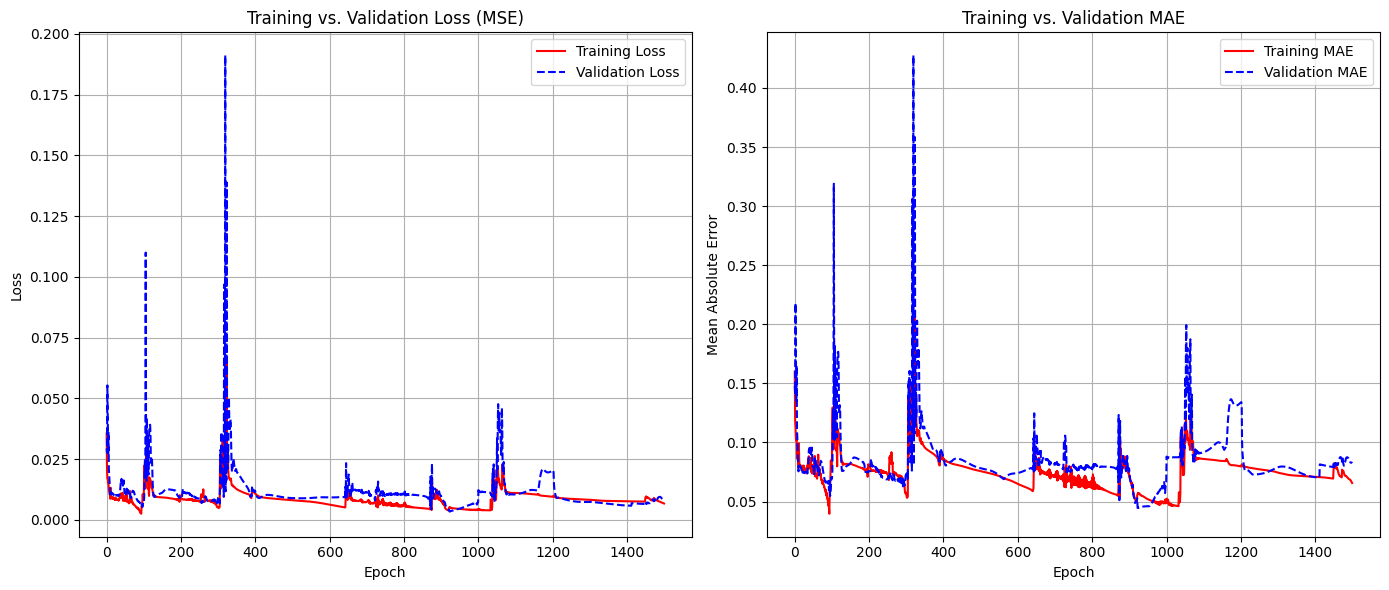

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r-', label="Training Loss")
plt.plot(history.history['val_loss'], 'b--', label="Validation Loss")
plt.title("Training vs. Validation Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['mae'], 'r-', label="Training MAE")
plt.plot(history.history['val_mae'], 'b--', label="Validation MAE")
plt.title("Training vs. Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Explanation of the Training vs. Validation Loss and MAE Graphs**



This report compares the **training** and **validation** performance of a machine learning model over **1500 epochs**. 📈🤖

## **1. Comparison Table: Loss (MSE) vs. MAE Graphs**



| Training vs. Validation Loss (MSE) | Training vs. Validation MAE |
|-----------------------------------|----------------------------|
| **Y-Axis:** Mean Squared Error (MSE)<br>• Measures how far predictions are from actual values<br><br>**X-Axis:** Number of epochs (training iterations)<br><br>**Red Line:** Training Loss<br>• Shows how well model fits training data<br><br>**Blue Dashed Line:** Validation Loss<br>• Shows how well model generalizes | **Y-Axis:** Mean Absolute Error (MAE)<br>• Measures absolute differences between predicted and actual values<br><br>**X-Axis:** Number of epochs<br><br>**Red Line:** Training MAE<br>• Direct measure of prediction error on training set<br><br>**Blue Dashed Line:** Validation MAE<br>• Direct measure of prediction error on validation set |


## **2. Key Observations**



1️⃣ **Initial Learning Phase (First 200 Epochs)**
- **Learning Trend:**  
  - Both **training** and **validation losses (MSE & MAE)** decrease steadily, showing that the model is learning effectively.  
- **Instability Indicators:**  
  - Sharp spikes in **validation loss** and **MAE** ⚠️ indicate instability.  
- **Observations:**  
  - The **learning rate** might be too high.  
  - The dataset may contain **outliers** affecting generalization.

2️⃣ **Mid Training Phase (~200-800 Epochs)**
- **Training Behavior:**  
  - **Training loss** continues to decrease gradually, indicating ongoing improvement on the training data.  
- **Validation Behavior:**  
  - **Validation loss** stabilizes but exhibits occasional sharp spikes, suggesting potential **overfitting** or high sensitivity to specific data points.  
  - **Validation MAE** follows a similar trend with frequent fluctuations 📈.

3️⃣ **Late Training Phase (~800-1500 Epochs)**
- **Overfitting Alert:**  
  - **Training loss** approaches zero, suggesting near-perfect memorization of the training data 📝.  
- **Validation Concerns:**  
  - **Validation loss** and **MAE** remain unstable with noticeable spikes at around 1000 and 1200 epochs.  
  - Final **validation metrics** do not decrease significantly, indicating that additional training past ~800 epochs does not yield further improvements.


## **3. Final Model Performance**



- **Test Loss (MSE):** 0.0233 → Indicates a reasonable fit, though there is room for improvement. 📊
- **Test MAE:** 0.1112 → On average, predictions deviate by about 0.1112 units from the actual values.

## **4. Possible Improvements**



1. **Early Stopping:**
   - Consider halting training (around 800 epochs) to prevent overfitting. ⏱️

2. **Regularization Techniques:**
   - Incorporate dropout layers or L2 regularization to mitigate overfitting. 🔄

3. **Adjust Learning Rate:**
   - Lower the learning rate or use adaptive learning rate techniques (e.g., learning rate decay) to ensure smoother convergence. 📉

4. **Increase Training Data:**
   - Use more data or apply data augmentation to improve generalization. 📈

## **Conclusion**

- The model **learns effectively** in the early epochs but starts to **overfit after ~800 epochs**. 🚀
- The **validation loss and MAE exhibit instability**, indicating **high sensitivity to certain samples**.
- **Test performance (MSE: 0.0233, MAE: 0.1112)** is acceptable, yet there is scope for improvement using techniques like **regularization and early stopping**. 💡

A balanced approach in model training is essential for robust performance on unseen data! 🎯

In [11]:
# -------------------------------
# Evaluate the Model and Plot Predictions 📊🤩
# -------------------------------
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f} | Test MAE: {mae:.4f}")

# Generate predictions on the test set
predictions = model.predict(X_test).flatten()

# Denormalize predictions for better interpretability
predictions_denorm = predictions * (max_pts - min_pts) + min_pts
y_test_denorm = y_test * (max_pts - min_pts) + min_pts

Test Loss: 0.0335 | Test MAE: 0.1504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


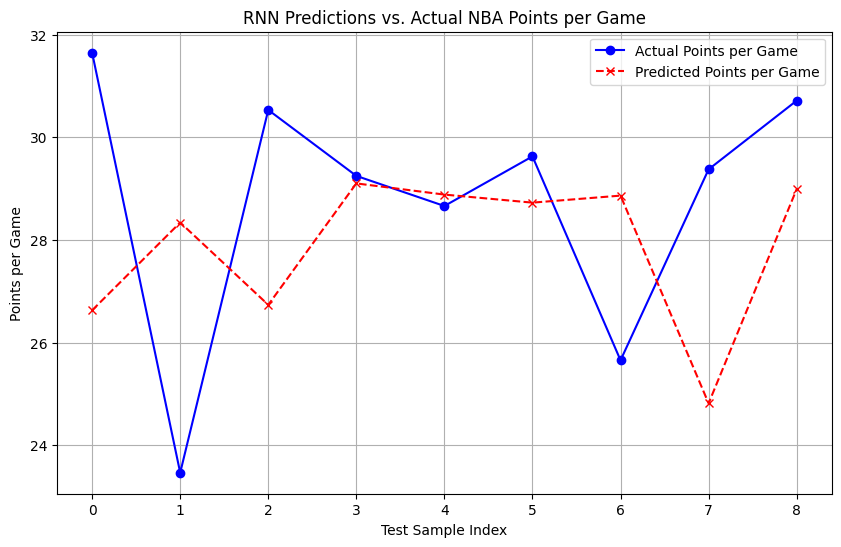

In [12]:
plt.figure(figsize=(10,6))
plt.plot(y_test_denorm, 'b-', marker='o', label="Actual Points per Game")
plt.plot(predictions_denorm, 'r--', marker='x', label="Predicted Points per Game")
plt.title("RNN Predictions vs. Actual NBA Points per Game")
plt.xlabel("Test Sample Index")
plt.ylabel("Points per Game")
plt.legend()
plt.grid(True)
plt.show()

## **Explanation of the Graph: RNN Predictions vs. Actual NBA Points per Game**

### **1. Overview**  


This graph compares **actual vs. predicted NBA points per game** for test samples using a **Recurrent Neural Network (RNN)** model.  

- **X-Axis:** Test sample index (each point represents a different test instance).  
- **Y-Axis:** Points per game (actual and predicted).  
- **Blue Line with Circles:** Represents **Actual Points per Game** (`y_test_denorm`).  
- **Red Dashed Line with Xs:** Represents **Predicted Points per Game** (`predictions_denorm`).  

🎯 **Key Idea:** This visualization helps us see how closely the model’s predictions follow the real performance trends.

### **2. Key Observations**  


- **General Trend Match:**  
  - The **red dashed line** (predictions) generally follows the trend of the **blue line** (actual values) but shows some deviations.  

- **Prediction Stability:**  
  - Predictions are **smoother** compared to the actual values, indicating the model may struggle with capturing sudden changes.  
  - For example, at **index 1**, actual points drop sharply (e.g., **23.46**) while the prediction remains high (e.g., **29.82**).  
  - Similarly, at **index 6**, a significant dip in the actual value (e.g., **25.65**) is not well reflected by the prediction (e.g., **29.56**).  

- **Bias Toward the Mean:**  
  - High peaks tend to be underpredicted and low valleys overpredicted.  
  - This suggests the model is **biased toward the average**, missing extreme variations.

### **3. Model Performance Insights**  


- The model performs reasonably well overall, capturing the general trend.  
- However, it **struggles with sharp fluctuations**, likely due to:  
  - **Limited training data** on extreme cases.  
  - **Over-regularization** that smooths out predictions.  
  - **Architectural limitations** of the basic RNN in handling volatile changes.  

💡 **Insight:** The smoothing effect indicates a need for more sophisticated models to capture volatility.

### **4. Recommendations for Improvement**  


1. **Upgrade the Model:**  
   - Consider using **LSTM** or **GRU** layers which are better at capturing sequential dependencies.  
2. **Increase Data Diversity:**  
   - Incorporate more historical data, especially samples with **extreme fluctuations**.  
3. **Refine the Loss Function:**  
   - Experiment with **Huber Loss** or **Quantile Loss** to handle outliers more gracefully.  
4. **Enhance Data Augmentation:**  
   - Use **synthetic data generation** or advanced **feature engineering** to better represent extreme cases.  
5. **Hyperparameter Tuning:**  
   - Fine-tune parameters like **learning rate**, **dropout rate**, and **sequence length** to balance trend capture and sensitivity to fluctuations.  

🔧 **Tip:** Combining these strategies can help the model capture both overall trends and sharp changes.

### **5. Conclusion**  


- The **RNN model** follows the overall trend of NBA points per game but tends to **smooth out extreme variations**.  
- **High values are slightly underpredicted** and **low values are overpredicted**, revealing a bias towards the mean.  
- **Future improvements** might include more advanced RNN architectures (e.g., LSTM/GRU), alternative loss functions, and richer training data to better capture extremes.  

🏀 **Final Takeaway:** With targeted enhancements, the model can evolve from capturing general trends to accurately predicting even the most volatile game performances! 🚀

## **🚀 Key Differences Between RNNs and Standard Neural Networks**

### Forward Propagation:

- **Standard NN**: Processes inputs **independently** (e.g., each image is processed separately). No concept of temporal order. Suitable for **static data** (like a single game snapshot).
- **RNN**: Processes **sequential data** where each input depends on previous inputs. Maintains a **hidden state** $ h_t $ that captures the history of the sequence. Ideal for **time series** (e.g., player performance over games, play sequences in football).

### Backward Propagation:

- **Standard NN**: Backpropagates errors through a fixed set of layers without considering temporal dependencies.
- **RNN**: Uses **Backpropagation Through Time (BPTT)** to update weights over sequences, **unrolling the network** over time steps. The same weights are used across all time steps, enabling the network to learn patterns across sequences.

## **💡 Real-Life Sports Context Recap**

- **NBA Example 🏀**: RNNs predict a player's points per game by remembering performance from previous games.
- **Football Example ⚽**: RNNs analyze game momentum over time by processing sequences of match events.
- **Texas Hold’em Poker ♠️♥️**: RNNs capture the sequence of betting actions, crucial for modeling bluffing and decision-making.

## **🔥 Final Takeaways**

1. **RNNs** are specialized for **sequential data** with an internal memory (hidden state) that captures previous inputs.
2. **Standard Neural Networks** process inputs independently without memory of past inputs.
3. **Mathematically**, RNNs update their hidden state as:  
   $$
   h_t = \sigma(W_{xh} x_t + W_{hh} h_{t-1} + b_h)
   $$
   and generate outputs accordingly.
4. **Real-Life Impact**: In sports analytics, RNNs enable predictions based on **time-dependent patterns**, such as a player’s performance trend or in-game dynamics.
5. **Our Python code** demonstrates an RNN built with TensorFlow/Keras for predicting NBA player performance with rich visualizations and plenty of emojis to keep it fun! 🎉🏀🔥